In [ ]:
#my question is Is there any effect of the scores of the players for draft selection?

In [180]:
%matplotlib inline
import pandas as pd
import scipy as sp
import thinkstats2 as ts
import thinkplot as tp
import nsfg

In [181]:
# ı read my dataframes.
players = pd.read_csv("basketball_players.csv")
draft = pd.read_csv("basketball_draft.csv")

In [182]:
print(players.columns)
#found columns 

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')


In [183]:
print(draft.columns)

Index([u'draftYear', u'draftRound', u'draftSelection', u'draftOverall',
       u'tmID', u'firstName', u'lastName', u'suffixName', u'playerID',
       u'draftFrom', u'lgID'],
      dtype='object')


In [184]:
players = players.set_index(['playerID', 'tmID'])
#I changed players for data index to (playerID, tmID)

In [185]:
 draft_Selection = draft.groupby(['playerID', 'tmID'])['draftSelection'].sum()
#calculte total draft selection 

In [186]:
players = players.join(draft_Selection)
#join draft selection's data in my dataset

In [187]:
players.describe()
#for calculation mean, standard deviation, min. ,max. %25,%50%75 values. 

,year,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,draftSelection
count,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,...,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,23751.000000,6536.000000
mean,1982.914235,1.034651,47.964338,0.935624,1097.296661,492.130689,50.382594,112.825271,209.064208,107.060376,...,1.193844,3.518378,7.878363,27.076544,12.292072,9.505873,7.163446,2.621742,0.918530,9.482099
std,19.996255,0.440119,27.818925,6.935694,993.764138,503.053318,69.506573,148.146626,238.276611,135.377884,...,4.441420,16.480370,15.258430,59.283753,27.441882,22.478324,17.131901,10.623536,3.939732,7.669392
min,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,1.000000,22.000000,0.000000,137.000000,81.000000,0.000000,0.000000,23.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1986.000000,1.000000,53.000000,0.000000,866.000000,329.000000,20.000000,52.000000,133.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,2000.000000,1.000000,75.000000,0.000000,1898.000000,758.500000,75.000000,173.000000,308.000000,152.000000,...,0.000000,1.000000,10.000000,26.000000,11.000000,8.000000,6.000000,0.000000,0.000000,15.000000
max,2011.000000,5.000000,84.000000,82.000000,3882.000000,4029.000000,895.000000,1111.000000,2149.000000,1164.000000,...,92.000000,2121.000000,520.000000,661.000000,306.000000,296.000000,205.000000,151.000000,58.000000,30.000000


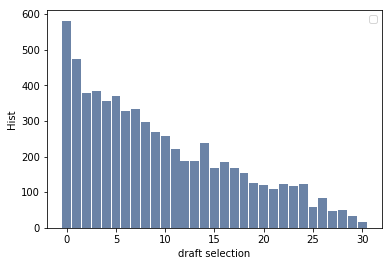

In [188]:
#found histogram for draft selection 
histds= thinkstats2.Hist(players.draftSelection)
thinkplot.Hist(histds)
thinkplot.Config(xlabel= 'draft selection', ylabel='Hist')

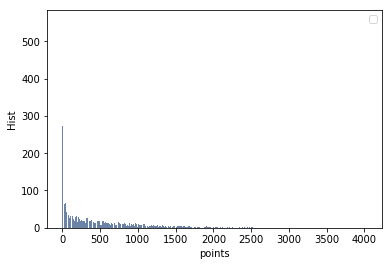

In [189]:
#found histogram for point 
histpoint= thinkstats2.Hist(players.points)
thinkplot.Hist(histpoint)
thinkplot.Config(xlabel= 'points', ylabel='Hist')

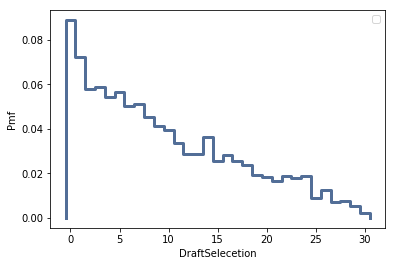

In [190]:
pmfds = thinkstats2.Pmf(players.draftSelection)
thinkplot.Pmf(pmfds)
thinkplot.Config(xlabel='DraftSelecetion', ylabel='Pmf')
#found pmf for draft selection 

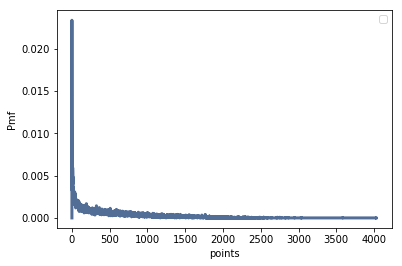

In [191]:
pmfpoint = thinkstats2.Pmf(players.points)
thinkplot.Pmf(pmfpoint)
thinkplot.Config(xlabel='points', ylabel='Pmf')
#found pmf for points 

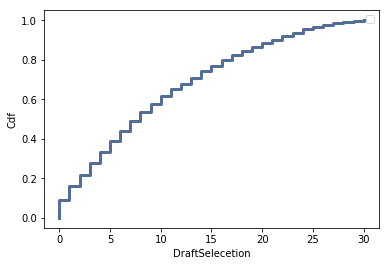

In [200]:
cdfds = thinkstats2.Cdf(players.draftSelection)
thinkplot.Cdf(cdfds)
thinkplot.Config(xlabel='DraftSelecetion', ylabel='Cdf')
#found cdf for draft selection 

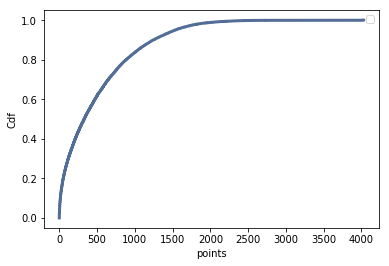

In [193]:
cdfpoint = thinkstats2.Cdf(players.points)
thinkplot.Cdf(cdfpoint)
thinkplot.Config(xlabel='points', ylabel='Cdf')
#found cdf for points

In [194]:
players.tail(20)

year  stint lgID  GP  GS  minutes  points  oRebounds  \
playerID  tmID                                                         
zeravji01 SYR   1946      0  NBL   2   0        0       5          0   
zevenph01 SAS   1987      1  NBA   8   0       58      30          4   
zhizhwa01 DAL   2000      1  NBA   5   0       38      24          1   
          DAL   2001      1  NBA  55   0      598     308         19   
          LAC   2002      1  NBA  41   0      412     182         26   
          LAC   2003      1  NBA   2   0        9       4          0   
          MIA   2003      2  NBA  14   0      105      43          4   
          MIA   2004      1  NBA  20   0       92      43          6   
zidekge01 CHH   1995      1  NBA  71   0      888     281         69   
          CHH   1996      1  NBA  36   0      288      91         25   
          DEN   1996      2  NBA  16   0       88      52         10   
          DEN   1997      1  NBA   6   0       42      18          4   
          SEA   1997      2  NBA   6   0       22      11          0   
ziegeba01 SHE   1941      0  NBL  15   0        0      40          0   
          SHE   1945      0  NBL   7   0        0       5          0   
zimmede01 NJN   2005      1  NBA   2   0       32       4          1   
zoetji01  DET   1982      1  NBA   7   0       30       2          3   
zopfbi01  MIL   1970      1  NBA  53   0      398     118          0   
zunicma01 FNT   1947      0  NBL  57   0        0     331          0   
          WSC   1948      1  NBA  56   0        0     273          0   

                dRebounds  rebounds       ...        PostTurnovers  PostPF  \
playerID  tmID                            ...                                
zeravji01 SYR           0         0       ...                    0       0   
zevenph01 SAS           9        13       ...                    0       0   
zhizhwa01 DAL           6         7       ...                    1       1   
          DAL          92       111       ...                    0      11   
          LAC          51        77       ...                    0       0   
          LAC           4         4       ...                    0       0   
          MIA          10        14       ...                    1       1   
          MIA          12        18       ...                    0       0   
zidekge01 CHH         114       183       ...                    0       0   
          CHH          38        63       ...                    0       0   
          DEN          13        23       ...                    0       0   
          DEN           9        13       ...                    0       0   
          SEA           4         4       ...                    0       0   
ziegeba01 SHE           0         0       ...                    0       0   
          SHE           0         0       ...                    0       0   
zimmede01 NJN           3         4       ...                    0       0   
zoetji01  DET           5         8       ...                    0       0   
zopfbi01  MIL           0        46       ...                    0       0   
zunicma01 FNT           0         0       ...                    0       0   
          WSC           0         0       ...                    0      26   

                PostfgAttempted  PostfgMade  PostftAttempted  PostftMade  \
playerID  tmID                                                             
zeravji01 SYR                 0           0                0           0   
zevenph01 SAS                 0           0                0           0   
zhizhwa01 DAL                 8           3                3           3   
          DAL                16           7                6           3   
          LAC                 0           0                0           0   
          LAC                 0           0                0           0   
          MIA                 0           0                0           0   
          MIA                 

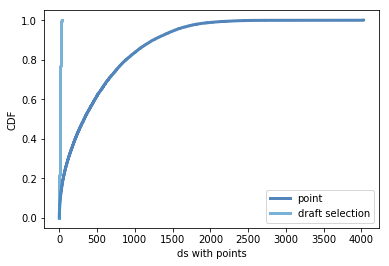

In [195]:
pointcdf = thinkstats2.Cdf(players.points, label='point')
dscdf = thinkstats2.Cdf(players.draftSelection, label='draft selection')

thinkplot.PrePlot(2)
thinkplot.Cdfs([pointcdf, dscdf])
thinkplot.Config(xlabel='ds with points', ylabel='CDF')
#found cdf for draft selection with points

In [196]:
pvalue = pointcdf[0]
pvalue
#found draft selection's p value for hypotesis

0.02336743716054061

In [197]:
pvalue = dscdf[0]
pvalue

0.08889228886168911

In [198]:
players.corr()

,year,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,draftSelection
year,1.000000,0.321196,0.151644,0.185745,0.204921,0.075553,0.260776,0.322403,0.085439,0.103975,...,0.134831,0.084208,0.032053,0.025387,0.019989,-0.002940,-0.007052,0.199686,0.183472,0.460507
stint,0.321196,1.000000,-0.029288,0.001627,0.020257,-0.020637,0.025129,0.022830,0.014150,0.015189,...,0.012352,0.010573,0.034234,0.018298,-0.003038,-0.000738,-0.009837,0.015177,0.015421,-0.008302
GP,0.151644,-0.029288,1.000000,0.069570,0.841796,0.744425,0.551357,0.585821,0.678836,0.616703,...,0.226414,0.182064,0.403990,0.384671,0.374903,0.349048,0.342088,0.195978,0.188541,-0.067299
GS,0.185745,0.001627,0.069570,1.000000,0.102986,0.086736,0.069774,0.120813,0.069506,0.072789,...,0.071631,0.040677,0.033123,0.057565,0.054285,0.048386,0.051065,0.096601,0.085372,0.017880
minutes,0.204921,0.020257,0.841796,0.102986,1.000000,0.908447,0.620917,0.694882,0.807392,0.756139,...,0.277222,0.228627,0.433033,0.489312,0.479741,0.445876,0.441874,0.252727,0.242575,-0.163099
points,0.075553,-0.020637,0.744425,0.086736,0.908447,1.000000,0.551717,0.617656,0.744812,0.719260,...,0.272585,0.237518,0.414748,0.553669,0.550758,0.528829,0.532078,0.243511,0.232828,-0.216729
oRebounds,0.260776,0.025129,0.551357,0.069774,0.620917,0.551717,1.000000,0.912198,0.717322,0.272207,...,0.392081,0.207777,0.304980,0.280494,0.301358,0.284432,0.264082,0.054725,0.047895,-0.049461
dRebounds,0.322403,0.022830,0.585821,0.120813,0.694882,0.617656,0.912198,1.000000,0.741233,0.386010,...,0.440916,0.244644,0.344898,0.349564,0.365895,0.338504,0.324803,0.172193,0.160262,-0.057892
rebounds,0.085439,0.014150,0.678836,0.069506,0.807392,0.744812,0.717322,0.741233,1.000000,0.427635,...,0.336776,0.175153,0.410888,0.421169,0.424514,0.428718,0.400849,0.078723,0.071079,-0.222869
assists,0.103975,0.015189,0.616703,0.072789,0.756139,0.719260,0.272207,0.386010,0.427635,1.000000,...,0.131541,0.218757,0.328336,0.430486,0.414834,0.387965,0.396853,0.274281,0.260060,-0.117778


In [199]:
players['points'].corr(players['draftSelection'])
#found correlation for draft selection

-0.21672887650997702